In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Load the data
data = pd.read_csv('breast_cancer.csv')


In [2]:
# this is where is downloaded the data set https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [3]:
# Display the data frame information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Display the first and last tuples of the data set
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# convert data to dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

print(df.head()) # To display the first tuple of the data set
print(df.tail()) # To display the last tuple of the data set

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [8]:
#Display the descriptive statistics 
# convert data to dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

print(df.head()) # To display the first tuple of the data set
print(df.tail()) # To display the last tuple of the data set
print(df.describe()) # To display the descriptive statistics of the data set

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [11]:
# add the class labels to the dataframe
df['class'] = pd.Series(data.target)

print(df.head()) # To display the first tuple of the data set
print(df.tail()) # To display the last tuple of the data set
print(df.describe()) # To display the descriptive statistics of the data set

# display the class label distribution
print(df['class'].value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

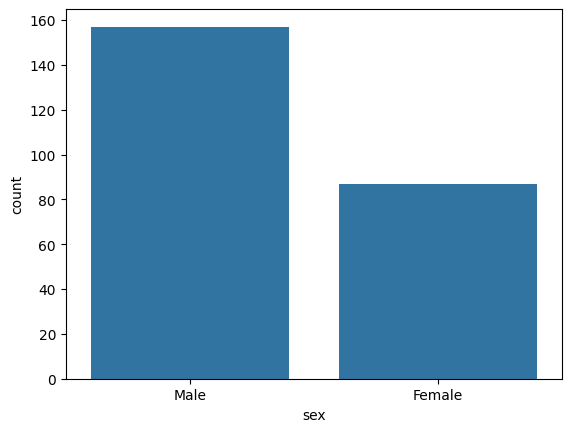

In [14]:
#Use seaborn to display count plot for the class label
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
df = sns.load_dataset('tips')
 
# count plot on single categorical variable
sns.countplot(x ='sex', data = df)
 
# Show the plot
plt.show()

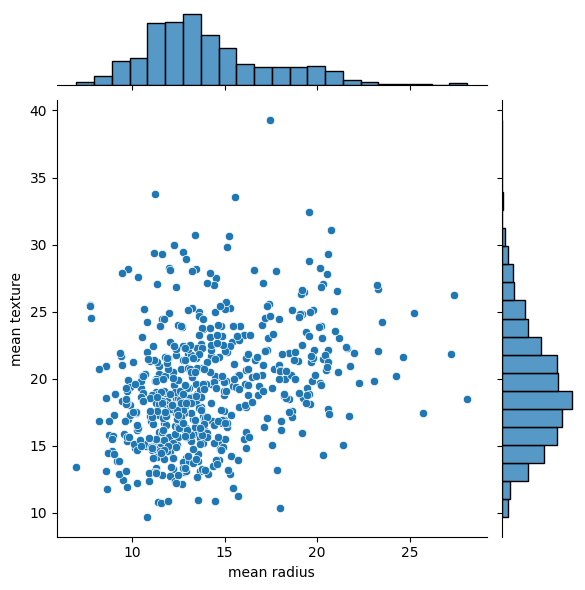

In [16]:
#Use seaborn to display a joint plot with any two variables of your choice.
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# convert data to dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# add the class labels to the dataframe
df['class'] = pd.Series(data.target)

# create a joint plot between the mean radius and mean texture
sns.jointplot(x='mean radius', y='mean texture', data=df)
plt.show()

In [20]:
import pandas as pd
from category_encoders import LeaveOneOutEncoder, TargetEncoder, HelmertEncoder, OneHotEncoder, OrdinalEncoder

def identify_category_encoder(df):
    """Identifies the appropriate category encoder for the dataset based on the percentage of categorical variables."""

    # Calculate the percentage of categorical variables in the dataset
    categorical_features = df.select_dtypes(include=['object', 'bool']).columns
    categorical_percentage = (len(categorical_features) / df.shape[1]) * 100

    # Based on the percentage of categorical variables, recommend an appropriate category encoder
    if categorical_percentage <= 5:
        return OneHotEncoder
    elif 5 < categorical_percentage <= 30:
        return HelmertEncoder
    elif 30 < categorical_percentage <= 60:
        return OrdinalEncoder
    elif 60 < categorical_percentage <= 95:
        return TargetEncoder
    else:
        return LeaveOneOutEncoder


category_encoder = identify_category_encoder(df)

print(f"The recommended category encoder for this dataset is: {category_encoder}")

The recommended category encoder for this dataset is: <class 'category_encoders.one_hot.OneHotEncoder'>


In [22]:
#Split the data such that 25% is reserved testing
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

print(f"The size of the training set is: {train_df.shape[0]}")
print(f"The size of the testing set is: {test_df.shape[0]}")

The size of the training set is: 426
The size of the testing set is: 143


In [27]:
#Show the shape of training set and the test set
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Print the shape of the training set and the test set
print(f"The shape of the training set is: {train_df.shape}")
print(f"The shape of the testing set is: {test_df.shape}")

The shape of the training set is: (426, 31)
The shape of the testing set is: (143, 31)


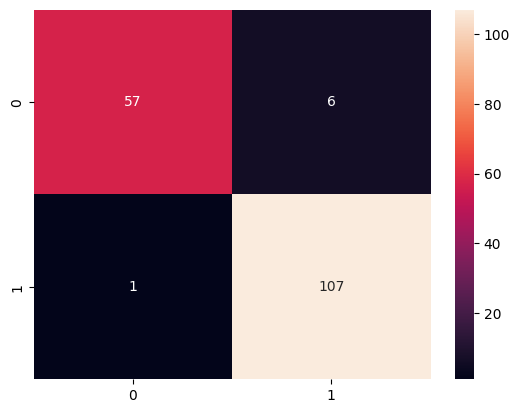

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Classification accuracy: 0.96


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer data set
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Divide the data set into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Apply K-NN to the training subset
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict the results on the testing subset
y_pred = classifier.predict(X_test)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(confusion, annot=True, fmt="d")
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate the classification accuracy
accuracy = (y_pred == y_test).mean()
print(f"Classification accuracy: {accuracy:.2f}")

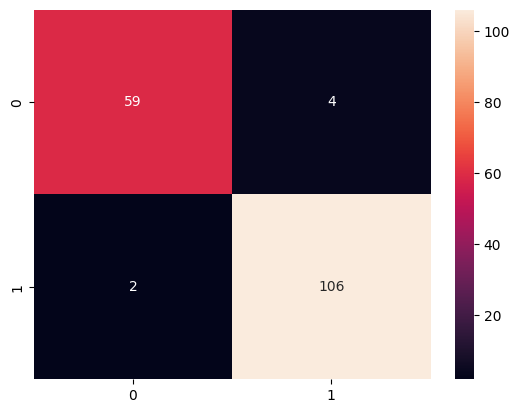

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Classification accuracy: 0.96


In [51]:
#Train a model using SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer data set
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Divide the data set into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Apply SVM to the training subset
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Predict the results on the testing subset
y_pred = classifier.predict(X_test)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(confusion, annot=True, fmt="d")
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate the classification accuracy
accuracy = (y_pred == y_test).mean()
print(f"Classification accuracy: {accuracy:.2f}")

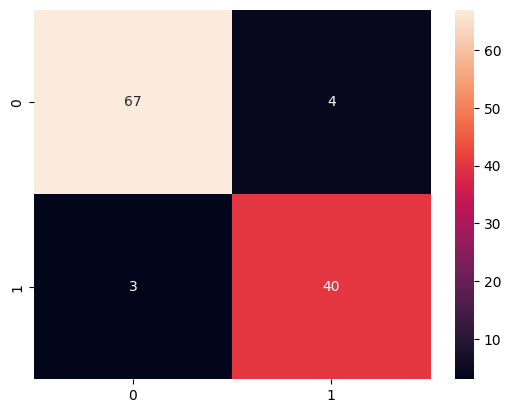

              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

Classification accuracy: 0.94


In [63]:
#Train a model using Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model on the training subset
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict the results on the testing subset
y_pred = classifier.predict(X_test)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(confusion, annot=True, fmt="d")
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate the classification accuracy
accuracy = (y_pred == y_test).mean()
print(f"Classification accuracy: {accuracy:.2f}")

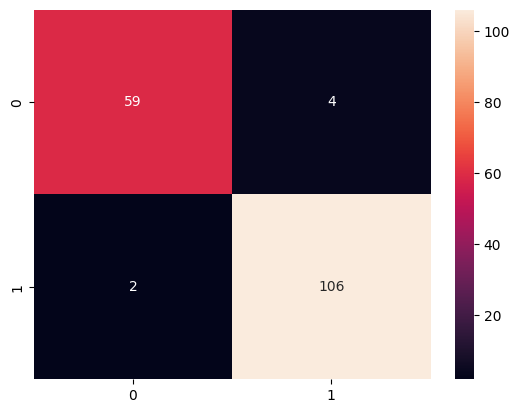

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Classification accuracy: 0.96
Training accuracy: 1.00
Testing accuracy: 0.96


In [55]:
#Train a model using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model on the training subset
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict the results on the testing subset
y_pred = classifier.predict(X_test)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(confusion, annot=True, fmt="d")
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate the classification accuracy
accuracy = (y_pred == y_test).mean()
print(f"Classification accuracy: {accuracy:.2f}")

# Calculate the training and testing accuracy
y_train_pred = classifier.predict(X_train)
train_accuracy = (y_train_pred == y_train).mean()
y_test_pred = classifier.predict(X_test)
test_accuracy = (y_test_pred == y_test).mean()

print(f"Training accuracy: {train_accuracy:.2f}")
print(f"Testing accuracy: {test_accuracy:.2f}")

In [ ]:
#Demonstrate by way of a plot, which ml algorithm performs better from your results above.

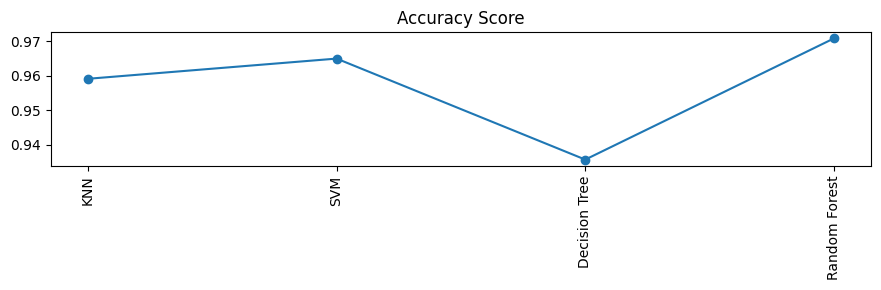

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Training models
models = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel='linear', C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

names = ['KNN', 'SVM', 'Decision Tree', 'Random Forest']
scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Plotting results
plt.figure(figsize=(9, 3))
plt.plot(names, scores, 'o-')
plt.title('Accuracy Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [62]:
#P107/1761G/20
#DENIS KIPKIRUI